In [0]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Val"

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

# CNN MODEL


In [0]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])


In [61]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 54, 54, 64)       

# Train

In [0]:
train_datagen = image.ImageDataGenerator(
    rescale = 1.0/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_dataset = image.ImageDataGenerator(rescale=1.0/255)

In [63]:
train_datagen = train_datagen.flow_from_directory(
    'CovidDataset/CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 158 images belonging to 2 classes.


In [64]:
train_datagen.class_indices

{'Covid': 0, 'Normal': 1}

In [65]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/CovidDataset/Val',
    target_size=(224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [66]:
hist = model.fit_generator(
    train_datagen,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 11s 1s/step - loss: 1.7878 - accuracy: 0.5635 - val_loss: 0.6852 - val_accuracy: 0.5500
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 0.6213 - accuracy: 0.6890 - val_loss: 0.5650 - val_accuracy: 0.9333
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 0.4160 - accuracy: 0.7976 - val_loss: 0.3688 - val_accuracy: 0.9000
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 0.3155 - accuracy: 0.8780 - val_loss: 0.2558 - val_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.2626 - accuracy: 0.8929 - val_loss: 0.1920 - val_accuracy: 0.9500
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 0.2098 - accuracy: 0.9365 - val_loss: 0.1997 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 0.2368 - accuracy: 0.9405 - val_loss: 0.0650 - val_accuracy: 0.9667
Epoch 8/10
8/8 [==================

In [0]:
model.save("cnn_v2.h5")

In [0]:
model.evaluate_generator(train_datagen)

In [0]:
model.evaluate_generator(validation_generator)

[0.04530800133943558, 0.9833333492279053]

# TEST

In [0]:
model = load_model('cnn_v2.h5')

In [0]:
import os 

In [84]:
train_datagen.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
y_actual = []
y_test = []

In [0]:
for i in os.listdir("CovidDataset/CovidDataset/Test/Normal/"):
  img = image.load_img("CovidDataset/CovidDataset/Test/Normal/" + i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [0]:
for i in os.listdir("CovidDataset/CovidDataset/Test/Covid/"):
  img = image.load_img("CovidDataset/CovidDataset/Test/Covid/" + i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [88]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)
print(y_actual.shape,y_test.shape)

(66,) (66,)


In [89]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_actual,y_test))

0.9696969696969697


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix(y_actual,y_test)

In [0]:
import seaborn as sns

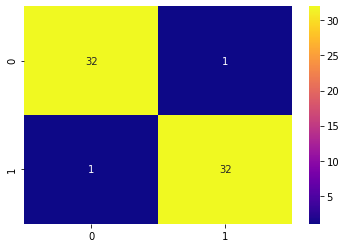

In [93]:
sns.heatmap(cm,cmap="plasma",annot=True)

# New Section